In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


train_data = np.load("train_data.npy")
train_labels = np.load("train_labels.npy")

# 轉換為 DataFrame
df = pd.DataFrame(train_data)
df['label'] = train_labels  # 添加標籤列


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,0.853843,-0.709693,0.142649,-0.176952,0.117582,-0.152395,1.207672,0.245734,1.924513,0.601621,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
1,1.128771,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.001865,1.037051,0.440938,0.447094,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,1
2,0.760572,-0.029401,0.142649,-0.176952,0.117582,-0.152395,0.433292,0.068885,0.908483,1.140838,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
3,1.114048,-0.029401,0.142649,-0.172883,0.117582,-0.152395,0.060256,0.198770,0.098029,0.820122,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
4,0.448862,-0.029401,0.142649,-0.176952,0.117582,-0.152395,1.321162,0.342947,1.146333,1.163741,...,0.000000,0.255428,3.080873,0.255428,-1.787995,0.201544,0.352000,0.393182,0.055556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174456,-0.129721,-0.786425,-0.241619,0.069267,-0.175944,0.029027,0.754470,-0.211944,0.696303,-1.608424,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174457,1.884997,0.018018,-0.241619,0.069267,1.691313,-1.663993,0.754470,0.379784,1.729425,-0.464348,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174458,0.328971,-0.786425,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-0.681625,0.329797,1.898219,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1
1174459,0.328971,1.541642,-0.241619,0.069267,-0.175944,0.029027,-1.562018,-1.484551,-0.186764,1.211692,...,-0.124224,-0.496894,2.496879,0.000000,-9.937888,3.961347,0.237263,0.355828,0.031489,1


### EDA 

In [3]:

print(df.describe())

print(df.isnull().sum().sum())    # non Null  


                  0             1             2             3             4  \
count  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06   
mean  -6.409919e-18  5.233205e-19 -5.826099e-18 -8.678650e-18 -4.416462e-19   
std    9.999996e-01  9.999996e-01  9.999996e-01  9.999851e-01  9.999996e-01   
min   -4.102287e+00 -6.799062e+00 -1.887302e+01 -1.348667e+01 -1.822159e+01   
25%   -8.101618e-01 -1.169213e-01  8.848725e-02 -1.783861e-01  7.723455e-02   
50%   -2.599778e-02  9.885173e-03  1.223657e-01 -1.576135e-01  1.085928e-01   
75%    8.136891e-01  8.379745e-02  1.484969e-01 -1.352318e-01  1.349873e-01   
max    4.071282e+00  6.882453e+00  1.567632e+01  1.915106e+01  1.583950e+01   

                  5             6             7             8             9  \
count  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06  1.174461e+06   
mean  -2.683908e-18  4.307563e-18 -1.709110e-17 -4.106704e-17 -1.318889e-18   
std    9.999945e-01  9.999996e-01  9.999996e-01  9.

Label distribution
可以使用：
- None balanced --> 加權分類器
- SMOTE  

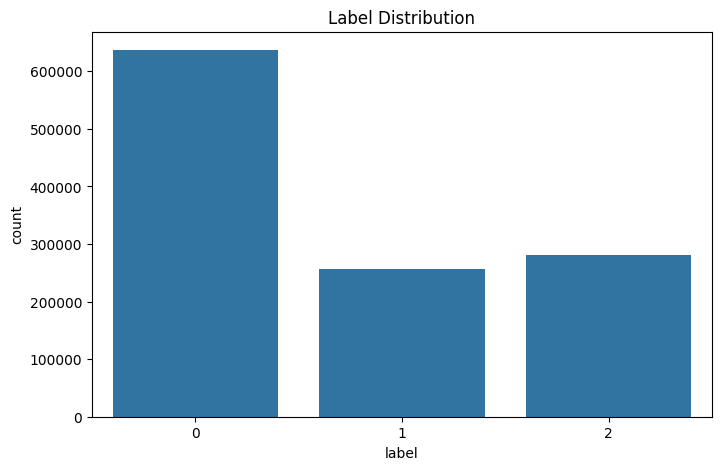

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['label'])
plt.title("Label Distribution")
plt.show()


Feature corr 
- high corr : potential issue for multicolliniarity 
- VIF 
    

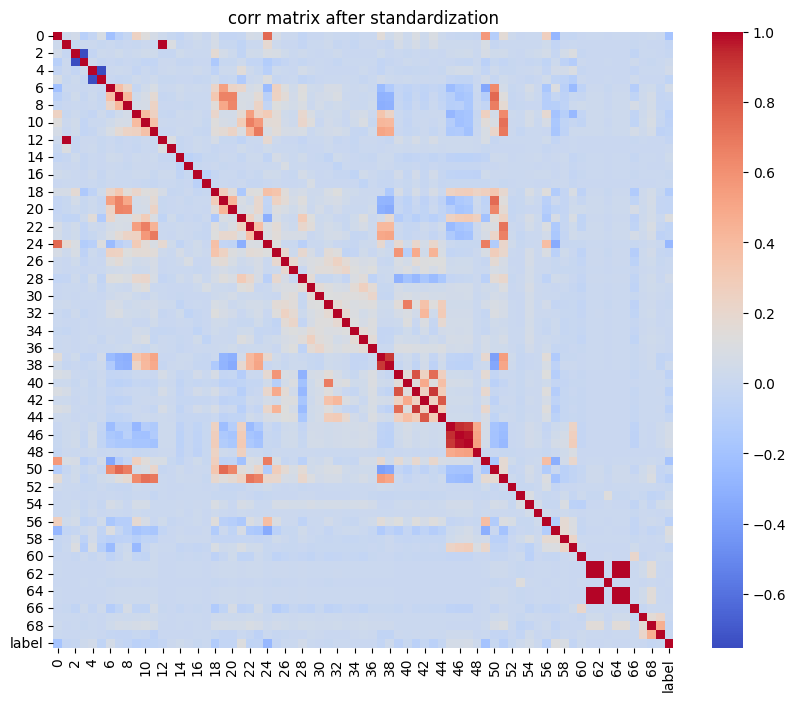

In [5]:
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')


scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df.drop(columns=['label'])),
    columns=df.drop(columns=['label']).columns
)
df_standardized['label'] = df['label']
corr_matrix_std = df_standardized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_std, cmap='coolwarm')
plt.title('corr matrix after standardization')
plt.show()

VIF

 Feature distribution 

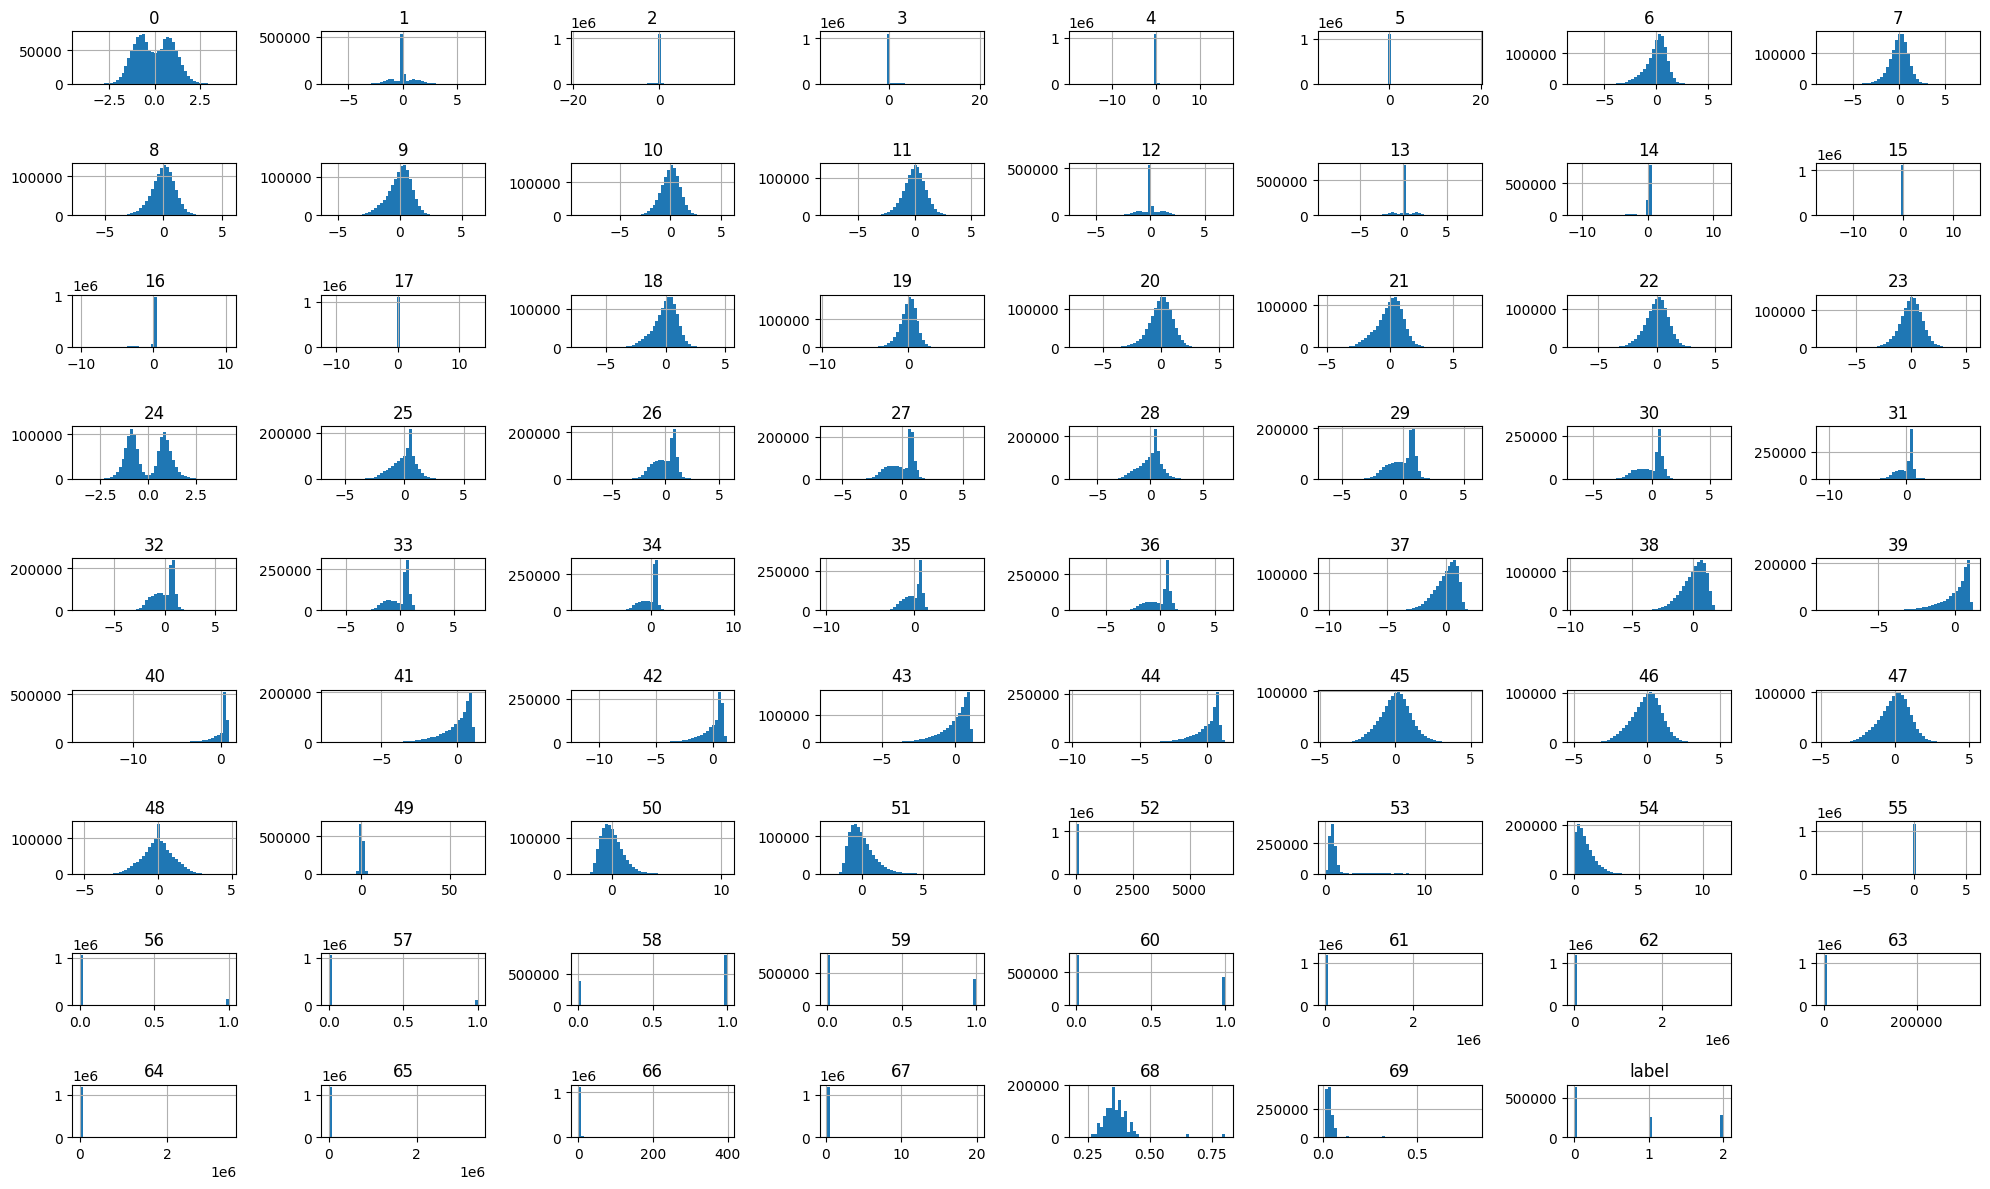

In [6]:

df.iloc[:].hist(figsize=(20,12), bins=50)
plt.grid(True)
plt.tight_layout()
plt.show()


### deep analysis on feature dist --> for feature selection 
- weird distribution ( that might be useless for training model )
    - high kurtosis
    - very high variance 
    - outliers 
    - heavily skewed 


- removed feature : single value or highly concentration with very high variance 
    - very high kurtosis or skew or std:52,  55, 61, 62, 63, 64, 65, 67 --> standardized 

- binary feature : val = ( 0, 1 )
    - 56, 57, 58, 59, 60

- edge (remained ): 66

In [ ]:

df[52].hist(figsize=(20,12), bins=100000)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [5]:
print(df[52].var())
print(df[52].mean())
print(df[52].median())
print(df[52].std())
print(df[52].skew())
print(df[52].kurt())
print(df[52].unique())

68.85953129964726
1.3455915621712766
1.0173076923076922
8.298164333130988
465.2160519747879
341159.10544411844
[0.55579171 0.61063723 0.63846532 ... 0.38543897 1.95439739 2.1840796 ]


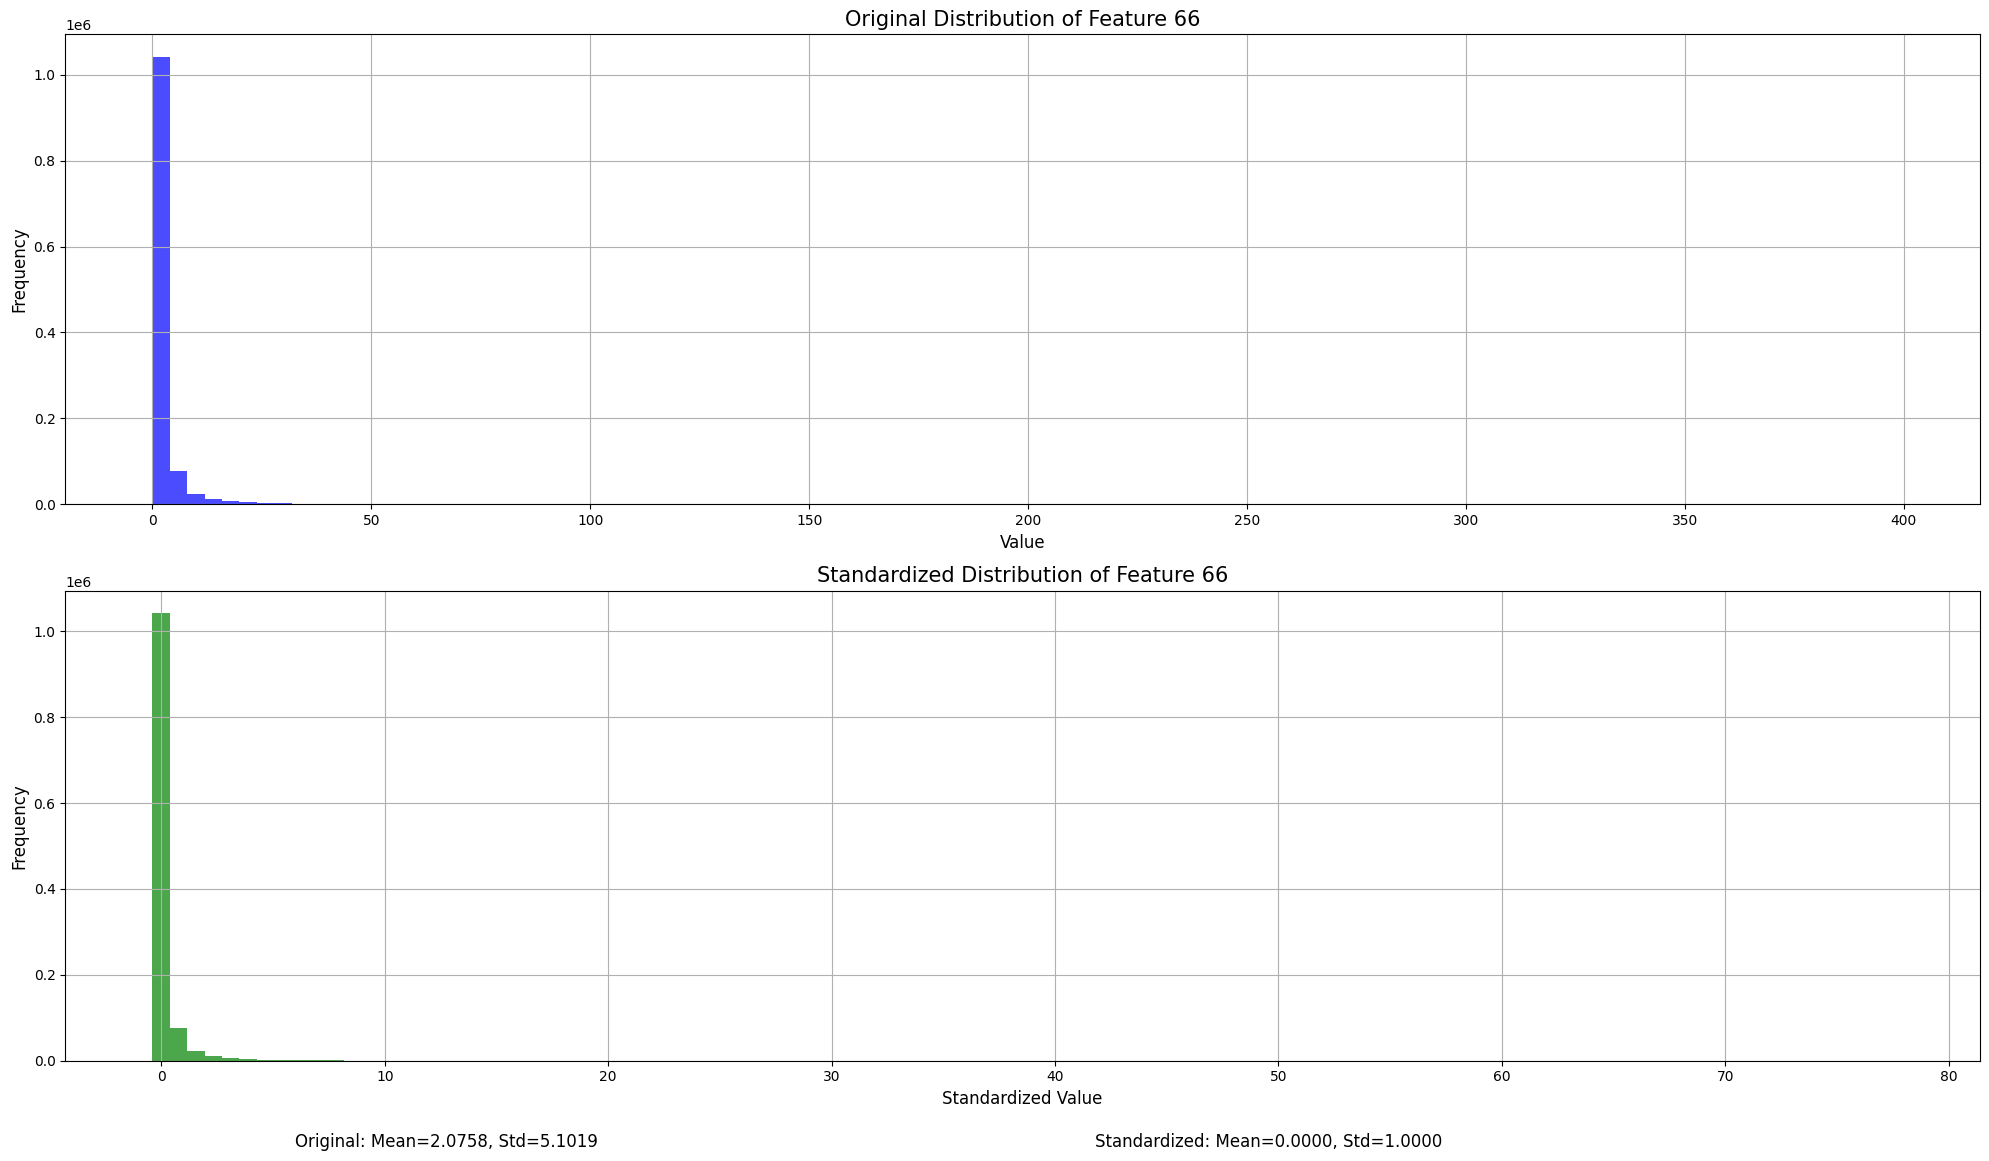

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 创建一个StandardScaler对象
scaler = StandardScaler()

# 对特征66进行标准化
# 注意：reshape(-1,1)是因为StandardScaler需要2D数组
feature_66 = df[66].values.reshape(-1, 1)
feature_66_standardized = scaler.fit_transform(feature_66).flatten()  # flatten回1D数组用于绘图

# 创建一个图形，包含原始数据和标准化数据的直方图
plt.figure(figsize=(20, 12))

# 绘制原始数据直方图
plt.subplot(2, 1, 1)
plt.hist(df[66], bins=100, alpha=0.7, color='blue')
plt.title('Original Distribution of Feature 66', fontsize=15)
plt.grid(True)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 绘制标准化后的数据直方图
plt.subplot(2, 1, 2)
plt.hist(feature_66_standardized, bins=100, alpha=0.7, color='green')
plt.title('Standardized Distribution of Feature 66', fontsize=15)
plt.grid(True)
plt.xlabel('Standardized Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 添加一些基本统计信息
plt.figtext(0.15, 0.01, f'Original: Mean={df[66].mean():.4f}, Std={df[66].std():.4f}', 
           fontsize=12, ha='left')
plt.figtext(0.55, 0.01, f'Standardized: Mean={feature_66_standardized.mean():.4f}, Std={feature_66_standardized.std():.4f}', 
           fontsize=12, ha='left')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # 为底部文本留出空间
plt.show()

# 如果需要，可以将标准化后的特征添加回DataFrame
df['feature_66_standardized'] = feature_66_standardized

### Feature selection 


feature selection description : 

In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import lightgbm as lgb
# from sklearn.model_selection import train_test_split
# import gc
# import warnings
# warnings.filterwarnings('ignore')

# class FeatureSelector:
#     """
#     特征选择类，用于：
#     1. 移除多重共线性特征
#     2. 使用LightGBM确定特征重要性
#     3. 识别低重要性特征
#     """
    
#     def __init__(self, data, labels=None):
#         """
#         初始化特征选择器
        
#         参数:
#             data: DataFrame 特征数据
#             labels: Series 目标变量
#         """
#         self.data = data
#         self.labels = labels
#         self.removal_ops = {}
#         self.feature_importances = None
#         self.corr_matrix = None
#         print(f'数据集包含 {self.data.shape[1]} 个特征，{self.data.shape[0]} 个样本。')
    
#     def identify_collinear(self, correlation_threshold=0.8):
#         """
#         识别并移除共线性特征
        
#         参数:
#             correlation_threshold: 相关系数阈值
#         """
#         # 计算相关矩阵
#         self.corr_matrix = self.data.corr().abs()
        
#         # 创建上三角掩码矩阵（不包括对角线）
#         upper = self.corr_matrix.where(
#             np.triu(np.ones(self.corr_matrix.shape), k=1).astype(bool))
        
#         # 识别相关系数高于阈值的特征
#         to_drop = [column for column in upper.columns 
#                    if any(upper[column] > correlation_threshold)]
        
#         # 记录要移除的特征
#         self.removal_ops['collinear'] = to_drop
        
#         print(f'识别出 {len(to_drop)} 个共线性特征（相关系数阈值 > {correlation_threshold}）')
#         return to_drop
    
#     def plot_collinear(self, plot_all=False, figsize=(12, 10)):
#         """
#         绘制共线性特征热图
#         """
#         if self.corr_matrix is None:
#             raise ValueError("请先调用identify_collinear计算相关矩阵")
        
#         if 'collinear' not in self.removal_ops:
#             print("没有检测到需要移除的共线性特征")
#             return
        
#         # 要绘制的特征
#         if plot_all:
#             features = self.data.columns
#         else:
#             features = self.removal_ops['collinear']
        
#         # 如果特征太多，限制数量
#         if len(features) > 30:
#             print(f"共线性特征过多({len(features)})，只绘制前30个")
#             features = features[:30]
        
#         # 提取相关矩阵的子集
#         corr_matrix_sub = self.corr_matrix.loc[features, features]
        
#         # 绘制热图
#         plt.figure(figsize=figsize)
#         sns.heatmap(corr_matrix_sub, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, linewidths=0.5)
#         plt.title('共线性特征相关系数矩阵', fontsize=14)
#         plt.tight_layout()
#         plt.show()
    
#     def identify_feature_importance(self, task='classification', eval_metric='multi_logloss', 
#                                   n_iterations=10, random_state=42):
#         """
#         使用LightGBM确定特征重要性
        
#         参数:
#             task: 'classification' 或 'regression'
#             eval_metric: 评估指标
#             n_iterations: 迭代次数
#             random_state: 随机种子
#         """
#         # 检查是否有标签
#         if self.labels is None:
#             raise ValueError("需要标签数据")
        
#         # 转换数据为numpy数组
#         features = self.data.copy().values
#         labels = self.labels.copy()
        
#         # 确定任务类型和目标函数
#         if task == 'classification':
#             # 获取类别数量
#             n_classes = len(np.unique(labels))
            
#             if n_classes == 2:
#                 objective = 'binary'
#                 if not set(np.unique(labels)).issubset({0, 1}):
#                     labels = (labels > 0).astype(int)
#                     print("警告：标签已转换为二进制格式（0和1）")
#             else:
#                 objective = 'multiclass'
#                 # 确保标签是从0开始的整数
#                 if not all(isinstance(x, (int, np.integer)) for x in np.unique(labels)):
#                     print("警告：多类别标签应该是整数，从0开始")
#                     unique_labels = sorted(set(labels))
#                     label_map = {label: i for i, label in enumerate(unique_labels)}
#                     labels = np.array([label_map[label] for label in labels])
#                     print(f"标签已映射为: {label_map}")
#         else:
#             objective = 'regression'
        
#         # 保存特征重要性
#         feature_importances = np.zeros(features.shape[1])
        
#         # 运行多次迭代，取平均特征重要性
#         for i in range(n_iterations):
#             # 分割数据
#             X_train, X_test, y_train, y_test = train_test_split(
#                 features, labels, test_size=0.2, random_state=random_state + i)
            
#             # 创建数据集
#             train_data = lgb.Dataset(X_train, label=y_train)
#             test_data = lgb.Dataset(X_test, label=y_test)
            
#             # 参数设置
#             params = {
#                 'objective': objective,
#                 'metric': eval_metric,
#                 'verbosity': -1,
#                 'seed': random_state + i
#             }
            
#             # 对于多分类，添加类别数量参数
#             if task == 'classification' and len(np.unique(labels)) > 2:
#                 params['num_class'] = len(np.unique(labels))
            
#             # 训练模型
#             model = lgb.train(params, train_data, valid_sets=[test_data])
            
#             # 获取特征重要性
#             feature_importances += model.feature_importance() / n_iterations
        
#         # 获取特征名称
#         feature_names = self.data.columns
        
#         # 创建特征重要性DataFrame
#         feature_importance_df = pd.DataFrame({
#             'feature': feature_names,
#             'importance': feature_importances
#         })
        
#         # 按照重要性排序
#         self.feature_importances = feature_importance_df.sort_values('importance', 
#                                                                    ascending=False).reset_index(drop=True)
        
#         # 识别零重要性特征
#         zero_importance_features = self.feature_importances[self.feature_importances['importance'] == 0]['feature'].tolist()
        
#         # 计算标准化重要性和累积重要性
#         self.feature_importances['normalized_importance'] = self.feature_importances['importance'] / self.feature_importances['importance'].sum()
#         self.feature_importances['cumulative_importance'] = np.cumsum(self.feature_importances['normalized_importance'])
        
#         # 记录要移除的特征
#         self.removal_ops['zero_importance'] = zero_importance_features
        
#         print(f'识别出 {len(zero_importance_features)} 个零重要性特征')
#         return self.feature_importances
    
#     def identify_low_importance(self, cumulative_importance=0.95):
#         """
#         识别累积重要性贡献小的特征
        
#         参数:
#             cumulative_importance: 保留的累积重要性阈值（0到1之间）
#         """
#         if self.feature_importances is None:
#             raise ValueError("请先调用identify_feature_importance计算特征重要性")
        
#         # 识别不在累积重要性阈值内的特征
#         low_importance_features = self.feature_importances[
#             self.feature_importances['cumulative_importance'] > cumulative_importance
#         ]['feature'].tolist()
        
#         # 记录要移除的特征
#         self.removal_ops['low_importance'] = low_importance_features
        
#         print(f'识别出 {len(low_importance_features)} 个低重要性特征（累积重要性阈值 > {cumulative_importance}）')
#         return low_importance_features
    
#     def plot_feature_importances(self, plot_n=20, figsize=(16, 10)):
    
#         if self.feature_importances is None:
#             raise ValueError("Please call identify_feature_importance first to calculate feature importance")
        
#         # Set style
#         plt.style.use('fivethirtyeight')
        
#         # Get number of features to plot
#         if plot_n > self.feature_importances.shape[0]:
#             plot_n = self.feature_importances.shape[0]
        
#         # Create figure and subplots with increased size
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
#         # Plot feature importance bar chart (horizontal for better readability)
#         importance_subset = self.feature_importances.iloc[:plot_n]
        
#         # Horizontal bar plot for better feature name visibility
#         bars = sns.barplot(x='normalized_importance', y='feature', data=importance_subset, ax=ax1)
        
#         # Increase font size for feature names
#         ax1.tick_params(axis='y', labelsize=10)
        
#         # Add the value at the end of each bar
#         for i, bar in enumerate(bars.patches):
#             value = importance_subset.iloc[i]['normalized_importance']
#             ax1.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
#                     f'{value:.3f}', ha='left', va='center', fontsize=9)
        
#         # Set English titles and labels
#         ax1.set_title('Normalized Feature Importance', fontsize=14)
#         ax1.set_ylabel('Feature', fontsize=12)
#         ax1.set_xlabel('Importance', fontsize=12)
        
#         # Plot cumulative importance curve
#         ax2.plot(list(range(1, len(self.feature_importances) + 1)), 
#                 self.feature_importances['cumulative_importance'], 'r-', linewidth=3)
#         ax2.set_xlabel('Number of Features', fontsize=12)
#         ax2.set_ylabel('Cumulative Importance', fontsize=12)
#         ax2.set_title('Feature Cumulative Importance', fontsize=14)
        
#         # Add reference line
#         if 'low_importance' in self.removal_ops:
#             threshold = 1.0 - len(self.removal_ops['low_importance']) / len(self.feature_importances)
#             ax2.axhline(y=threshold, color='b', linestyle='--', linewidth=2)
#             ax2.text(len(self.feature_importances)/3, threshold + 0.02, 
#                     f'Threshold: {threshold:.2f}', color='b', fontsize=11)
        
#         # Improve grid visibility
#         ax1.grid(True, alpha=0.3)
#         ax2.grid(True, alpha=0.3)
        
#         # Ensure no text gets cut off
#         plt.tight_layout()
#         plt.show()
        
#         # Optional: Create a separate larger plot just for feature importance
#         # This helps when there are many features to display
#         if plot_n > 10:
#             plt.figure(figsize=(10, max(8, plot_n * 0.4)))  # Dynamically adjust height based on feature count
#             bars = sns.barplot(y='feature', x='normalized_importance', data=importance_subset)
            
#             for i, bar in enumerate(bars.patches):
#                 value = importance_subset.iloc[i]['normalized_importance']
#                 plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
#                         f'{value:.3f}', ha='left', va='center')
            
#             plt.title('Detailed Feature Importance', fontsize=14)
#             plt.ylabel('Feature', fontsize=12)
#             plt.xlabel('Normalized Importance', fontsize=12)
#             plt.tight_layout()
#             plt.show()
            
#     def remove_features(self, methods=['collinear', 'zero_importance', 'low_importance']):
#         """
#         移除特征并返回新的数据集
        
#         参数:
#             methods: 要使用的方法列表
            
#         返回:
#             移除特征后的数据集
#         """
#         # 检查方法是否有效
#         for method in methods:
#             if method not in self.removal_ops:
#                 raise ValueError(f"方法 {method} 未执行")
        
#         # 获取要移除的特征
#         features_to_remove = set()
#         for method in methods:
#             features_to_remove.update(self.removal_ops[method])
        
#         # 移除特征并返回新的数据集
#         reduced_data = self.data.drop(columns=list(features_to_remove))
#         print(f'原始数据维度: {self.data.shape}')
#         print(f'移除特征后的数据维度: {reduced_data.shape}')
#         print(f'移除了 {len(features_to_remove)} 个特征')
        
#         return reduced_data



In [ ]:
# print("\n第2步：准备特征和标签")
# # 假设最后一列是标签
# features = df.iloc[:, :-1]  # 所有特征列
# labels = df.iloc[:, -1]     # 最后一列为标签
# print(f"特征数量: {features.shape[1]}")
# print(f"样本数量: {features.shape[0]}")

# # 3. 初始化特征选择器
# print("\n第3步：初始化特征选择器")
# fs = FeatureSelector(data=features, labels=labels)

# # 4. 识别共线性特征
# print("\n第4步：识别共线性特征")
# fs.identify_collinear(correlation_threshold=0.8)

# # 5. 绘制共线性特征热图
# print("\n第5步：绘制共线性特征热图")
# fs.plot_collinear()



In [ ]:
# # 6. 计算特征重要性
# print("\n第6步：计算特征重要性")
# # 对于分类任务，使用分类参数
# fs.identify_feature_importance(task='classification', eval_metric='multi_logloss')
# # 对于回归任务，使用回归参数
# # fs.identify_feature_importance(task='regression', eval_metric='rmse')

# # 7. 识别低重要性特征
# print("\n第7步：识别低重要性特征")
# fs.identify_low_importance(cumulative_importance=0.95)

# # 8. 绘制特征重要性图
# print("\n第8步：绘制特征重要性图")
# fs.plot_feature_importances(plot_n=20)

# # 9. 移除特征并创建新数据集
# print("\n第9步：移除特征并创建新数据集")
# reduced_data = fs.remove_features(methods=['collinear', 'zero_importance', 'low_importance'])

# # 10. 保存处理后的数据
# print("\n第10步：保存处理后的数据")
# reduced_data.to_csv('reduced_features_data.csv', index=False)
# print("已保存处理后的数据至 'reduced_features_data.csv'")

# # 额外：显示保留的特征
# print("\n保留的特征:")
# for i, feature in enumerate(reduced_data.columns):
#     print(f"    {i+1}. {feature}")

# print("\n特征选择完成！")



待解決問題：
1. Normalization : to do what ? 
    - vs standardization ? 

上面function 步驟: 
1. 共線性： threshold : 0.8 
    - discover 10 features
2. feature importance : lightGBM 
    - 為什麼使用 lightGBM ? 
        - A: 
3. identify low importance and cumulative: 
    - threshold : 0.95 
    
    

### 降維
currently this will crash 
- Kernal PCA 
- Autoencoder  --> DL 

### models 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataframe (assuming it's already loaded as 'df')
# df = pd.read_csv('your_data.csv')  # Uncomment and adjust if loading from file

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Select retained features
retained_features = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 31, 34, 37, 45, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 66, 67, 68, 69]
X_selected = X.iloc[:, retained_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
lr_model = LogisticRegression(multi_class='multinomial', max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Address imbalance with class_weight='balanced' to give more weight to minority classes (1 and 2).

XGBoost 

In [ ]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, scale_pos_weight=1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



In [ ]:
# Optional: Use SMOTE to handle imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

xgb_model_smote = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_model_smote.predict(X_test_scaled)
print("XGBoost with SMOTE Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_smote))

NN 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the NN model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test_cat)
print("Neural Network Results:")
print("Test Accuracy:", accuracy)

# Predict and convert back to labels
y_pred_nn = np.argmax(nn_model.predict(X_test_scaled), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

### Feature selection 

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming your dataframe is loaded as 'df'
# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Step 1: Compute Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns, name='MI_Scores')

# Sort features by MI scores
mi_scores = mi_scores.sort_values(ascending=False)
print("Mutual Information Scores for each feature:")
print(mi_scores)

# Select top 50 features based on MI (arbitrary threshold to reduce to a manageable number for RFE)
top_features = mi_scores.index[:50]
X_top = X[top_features]



RFE : what is this ? 

In [ ]:
# Step 2: Apply RFE to further reduce features
# Scale the data for Logistic Regression
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

# Initialize Logistic Regression for RFE
estimator = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=30)  # Select 30 features
rfe.fit(X_top_scaled, y)

# Get selected features
selected_features = top_features[rfe.support_]
print("\nSelected Features after RFE:")
print(selected_features)

# Create new dataset with selected features
X_selected = X[selected_features]

# Split the data for further processing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
print("\nShape of X_train after feature selection:", X_train.shape)
print("Shape of X_test after feature selection:", X_test.shape)

# Save the selected features dataset for reference
X_selected['label'] = y
X_selected.to_csv('selected_features_data.csv', index=False)
print("Selected features dataset saved to 'selected_features_data.csv'")

In [ ]:
X_selected

PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the selected features --> PCA
X_selected.columns = X_selected.columns.astype(str)

X_selected_scaled = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_selected_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)



In [ ]:
# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:

# Find the number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components_95}")

# Re-apply PCA with the selected number of components
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(X_selected_scaled)



In [ ]:
# Split the PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, y, test_size=0.2, random_state=42, stratify=y)
print("\nShape of X_train after PCA:", X_train_pca.shape)
print("Shape of X_test after PCA:", X_test_pca.shape)

# Save the PCA-transformed dataset
pca_df = pd.DataFrame(X_pca_95, columns=[f'PC{i+1}' for i in range(n_components_95)])
pca_df['label'] = y.values
pca_df.to_csv('pca_transformed_data.csv', index=False)
print("PCA-transformed dataset saved to 'pca_transformed_data.csv'")

In [ ]:
pca_df

Refitting the model 

Logistic 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 擬合邏輯回歸模型
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_pca, y_train_pca)

# 預測並評估
y_pred_logistic = logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, y_pred_logistic)

print("邏輯回歸模型評估（PCA後）:")
print(f"準確率: {accuracy:.4f}")
print("\n分類報告:")
print(classification_report(y_test_pca, y_pred_logistic))
print("\n混淆矩陣:")
print(confusion_matrix(y_test_pca, y_pred_logistic))

NN 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 對PCA結果進行標準化（神經網絡通常需要標準化輸入）
scaler_nn = StandardScaler()
X_train_pca_scaled = scaler_nn.fit_transform(X_train_pca)
X_test_pca_scaled = scaler_nn.transform(X_test_pca)

# 擬合神經網絡模型
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 兩個隱藏層，分別有100和50個神經元
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=1000,
    random_state=42
)

nn_model.fit(X_train_pca_scaled, y_train_pca)

# 預測並評估
y_pred_nn = nn_model.predict(X_test_pca_scaled)
accuracy_nn = accuracy_score(y_test_pca, y_pred_nn)

print("神經網絡模型評估（PCA後）:")
print(f"準確率: {accuracy_nn:.4f}")
print("\n分類報告:")
print(classification_report(y_test_pca, y_pred_nn))

### Eval Data (OOSample)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 載入評估數據和標籤
eval_data = np.load('eval_data.npy')
eval_labels = np.load('eval_labels.npy')

print(f"評估數據形狀: {eval_data.shape}")
print(f"評估標籤形狀: {eval_labels.shape}")

# 2. 根據RFE選定的特徵索引篩選評估數據的特徵
# 這些是您通過RFE選擇的30個特徵的索引
